EDA

In [0]:
eda=spark.read.parquet(f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/pavan-bucket/final_dataset_1/part-00000-tid-7859284432058038436-acfb97c2-0415-4be1-9c86-8ac2e04262e7-72183-1-c000.snappy.parquet") 
# the final dataset which has the columns from all three individual datasets.

In [0]:
selected_columns = ['passenger_count', 'trip_distance', 'payment_type', 'total_amount']
eda.select(selected_columns).summary().show()

+-------+------------------+------------------+------------------+------------------+
|summary|   passenger_count|     trip_distance|      payment_type|      total_amount|
+-------+------------------+------------------+------------------+------------------+
|  count|          59458094|          59458094|          59458094|          59458094|
|   mean|1.4466089343529915|3.3919204263427365|1.2164959071846466|18.739361096997033|
| stddev|0.9819084684075271| 4.222388278686722|0.4290612291304965|13.599904662487965|
|    min|               1.0|              0.26|                 1|              5.05|
|    25%|               1.0|              1.15|                 1|              11.3|
|    50%|               1.0|               1.9|                 1|              14.3|
|    75%|               2.0|              3.41|                 1|              19.8|
|    max|               6.0|             49.98|                 5|             495.8|
+-------+------------------+------------------+-------

The heatmap shows the number of trips booked for the period of 2 years starting from Jan 2021 and Dec 2022

The highest number of bookings are made in the evening around 6 PM.
The number of trips distribution is similar for most of the days for the week.

/root/.ipykernel/1410/command-300359542754797-2420838541:18: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = pandas_df.pivot('hour_of_day', 'day_of_week', 'count')


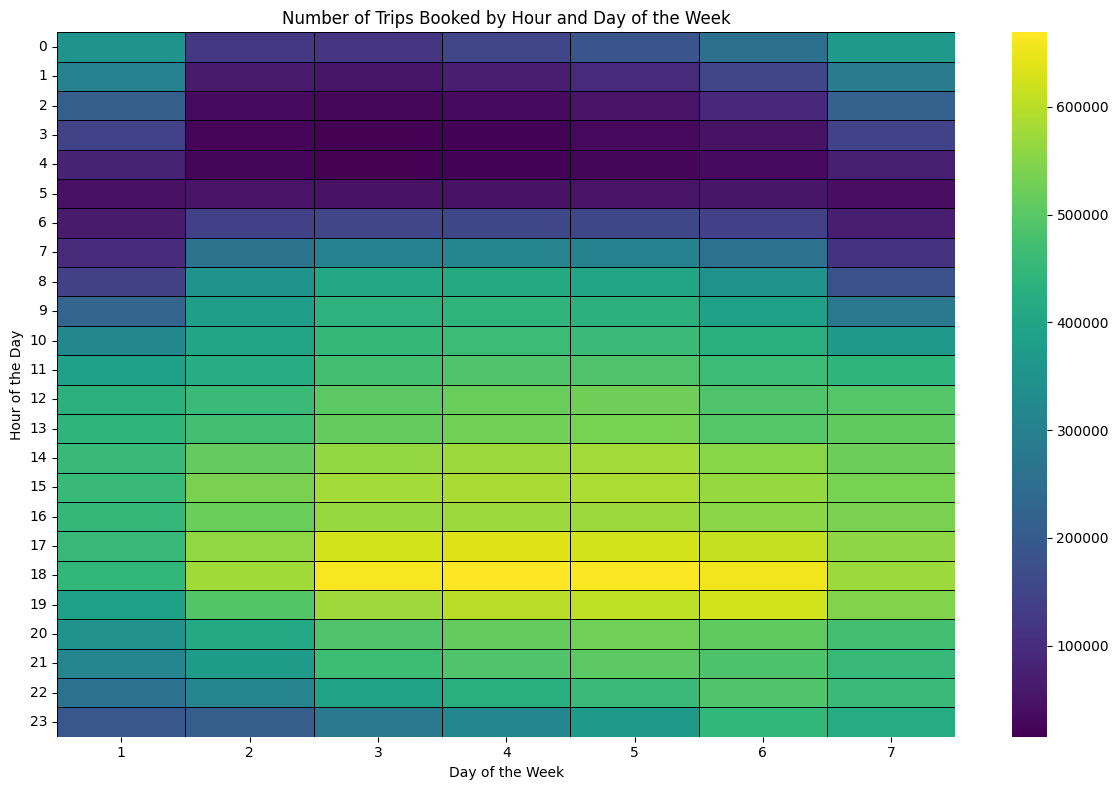

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour, dayofweek

# Extract day of the week and hour from the timestamp
eda = eda.withColumn('day_of_week', dayofweek('tpep_pickup_datetime'))
eda = eda.withColumn('hour_of_day', hour('tpep_pickup_datetime'))

# Group by day of the week and hour of the day, count trips
grouped = eda.groupby('day_of_week', 'hour_of_day').count().orderBy('day_of_week', 'hour_of_day')

# Convert to Pandas DataFrame for visualization
pandas_df = grouped.toPandas()

# Pivot the data for heatmap visualization
heatmap_data = pandas_df.pivot('hour_of_day', 'day_of_week', 'count')

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5, linecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.title('Number of Trips Booked by Hour and Day of the Week')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The other EDA have been created using Tableau dashboard.